In [1]:
import pandas as pd
import numpy as np
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt

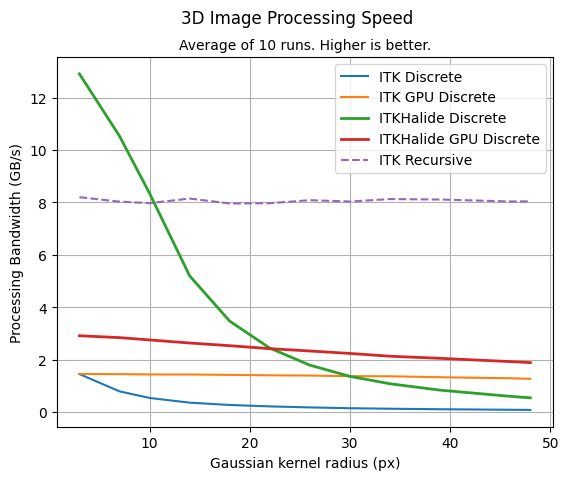

In [2]:
df = pd.read_csv('bandwidth-benchmark.csv', index_col=False)
df = df.groupby('radius')

def plot(ser, **kw):
    plt.plot(ser.mean().index, ser.mean(), **kw)
    
plot(df.itk_cpu, label='ITK Discrete')
plot(df.itk_gpu, label='ITK GPU Discrete')
plot(df.hal_cpu, label='ITKHalide Discrete', lw=2)
plot(df.hal_gpu, label='ITKHalide GPU Discrete', lw=2)
plot(df.itk_rec, label='ITK Recursive', ls='dashed')

plt.suptitle('3D Image Processing Speed')
plt.title('Average of 10 runs. Higher is better.', fontsize=10)

plt.ylabel('Processing Bandwidth (GB/s)')
plt.xlabel('Gaussian kernel radius (px)')

plt.legend(loc='upper right')

plt.grid(True)

None